导入工具包

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

导入数据集

In [2]:
G = nx.les_miserables_graph()

In [3]:
G.nodes

NodeView(('Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

构建Node2Vec模型

In [8]:
from node2vec import Node2Vec

In [21]:
node2vec = Node2Vec(G, dimensions=32, walk_length=30, num_walks=600, p=2, q=0.5)

Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 600/600 [00:04<00:00, 129.00it/s]


In [29]:
model = node2vec.fit(window=3, min_count=1, batch_words=4)

In [30]:
X = model.wv.vectors

节点Embedding聚类可视化

In [31]:
from sklearn.cluster import KMeans
import numpy as np
cluster_labels = KMeans(n_clusters=3).fit(X).labels_

f:\ANACONDA\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\ANACONDA\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
cluster_labels

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1])

In [33]:
colors = []
nodes = list(G.nodes)

In [34]:
for node in nodes:
    idx = model.wv.key_to_index[str(node)]
    colors.append(cluster_labels[idx])

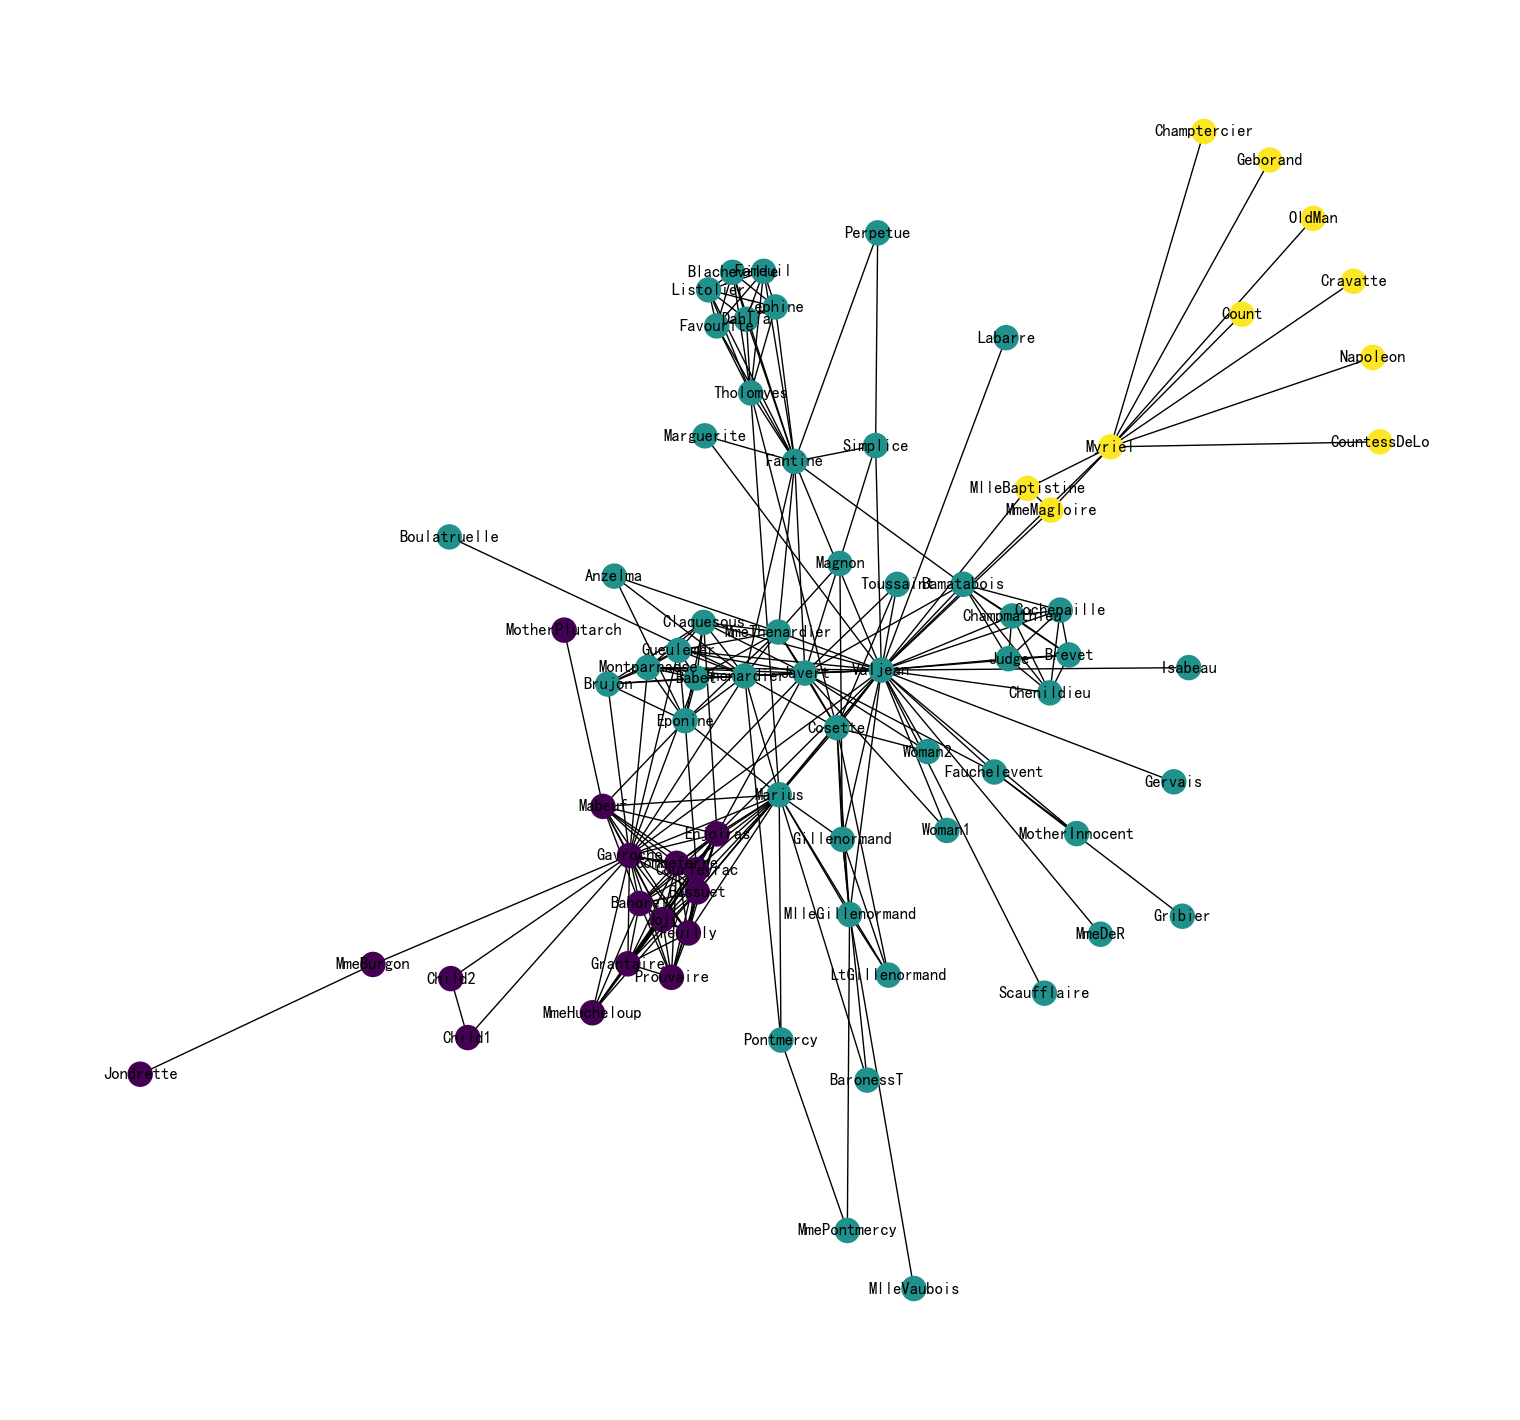

In [35]:
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(G, seed = 10)
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()

查看Embedding

In [38]:
model.wv.get_vector('Napoleon').shape

(32,)

In [39]:
model.wv.get_vector('Napoleon')

array([ 0.38460475, -0.19602063, -0.43358284,  0.50138134, -0.0159994 ,
        0.20266637,  0.33741763,  0.82625115, -0.05507432,  0.22072122,
        0.00590514, -0.7203951 , -0.07238863,  0.40741563,  0.2304408 ,
       -0.01549797,  0.411934  , -0.11614534, -0.39914072,  0.29525205,
        0.56028634, -0.32207242,  0.8366139 ,  0.62221265, -0.19054012,
        0.14778198,  0.2426037 ,  0.13450746, -0.0343885 , -0.8146197 ,
       -0.05761464,  0.37778988], dtype=float32)

In [40]:
model.wv.most_similar('Napoleon')

[('Geborand', 0.971511721611023),
 ('Champtercier', 0.9702849388122559),
 ('Cravatte', 0.9693487286567688),
 ('CountessDeLo', 0.9649040102958679),
 ('Count', 0.9569987654685974),
 ('OldMan', 0.952797532081604),
 ('MlleBaptistine', 0.9403890371322632),
 ('MmeMagloire', 0.9206732511520386),
 ('Myriel', 0.8661033511161804),
 ('Labarre', 0.46644169092178345)]

In [41]:
model.wv.similar_by_word('Napoleon')

[('Geborand', 0.971511721611023),
 ('Champtercier', 0.9702849388122559),
 ('Cravatte', 0.9693487286567688),
 ('CountessDeLo', 0.9649040102958679),
 ('Count', 0.9569987654685974),
 ('OldMan', 0.952797532081604),
 ('MlleBaptistine', 0.9403890371322632),
 ('MmeMagloire', 0.9206732511520386),
 ('Myriel', 0.8661033511161804),
 ('Labarre', 0.46644169092178345)]

In [42]:
model.wv.similarity('Napoleon', 'Champtercier')

0.97028494

对Edge做Embedding

In [43]:
from node2vec.edges import HadamardEmbedder

In [44]:
edge_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [45]:
edge_embs[('Napoleon', 'Champtercier')]

array([ 1.21085256e-01, -7.59298587e-03,  1.84668750e-01,  1.24913655e-01,
       -7.22369703e-04,  6.03855625e-02,  1.45661071e-01,  6.79130852e-01,
       -6.28578244e-04,  7.12174699e-02,  1.68722690e-04,  5.18165112e-01,
        2.15919828e-03,  1.31923780e-01,  4.81095724e-02,  2.37709004e-03,
        1.46383077e-01,  2.27840040e-02,  1.73987955e-01,  1.29779309e-01,
        3.13947797e-01,  6.24313317e-02,  6.41550899e-01,  4.00611341e-01,
        5.07908128e-03,  2.70382073e-02,  5.28125390e-02,  2.57334523e-02,
        4.55696089e-03,  5.61180770e-01,  5.27400570e-03,  1.46375701e-01],
      dtype=float32)

In [46]:
# 所有edge的Embedding
edges_kv = edge_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 3003/3003.0 [00:00<00:00, 299849.90it/s]


In [48]:
edges_kv.index_to_key

["('Valjean', 'Valjean')",
 "('Marius', 'Valjean')",
 "('Enjolras', 'Valjean')",
 "('Courfeyrac', 'Valjean')",
 "('Cosette', 'Valjean')",
 "('Thenardier', 'Valjean')",
 "('Combeferre', 'Valjean')",
 "('Bossuet', 'Valjean')",
 "('Gavroche', 'Valjean')",
 "('Myriel', 'Valjean')",
 "('Javert', 'Valjean')",
 "('Fantine', 'Valjean')",
 "('Joly', 'Valjean')",
 "('MmeThenardier', 'Valjean')",
 "('Bahorel', 'Valjean')",
 "('Feuilly', 'Valjean')",
 "('Gillenormand', 'Valjean')",
 "('Babet', 'Valjean')",
 "('Tholomyes', 'Valjean')",
 "('MmeMagloire', 'Valjean')",
 "('MlleGillenormand', 'Valjean')",
 "('Gueulemer', 'Valjean')",
 "('Favourite', 'Valjean')",
 "('Dahlia', 'Valjean')",
 "('Blacheville', 'Valjean')",
 "('Eponine', 'Valjean')",
 "('MlleBaptistine', 'Valjean')",
 "('Listolier', 'Valjean')",
 "('Valjean', 'Zephine')",
 "('Fameuil', 'Valjean')",
 "('Claquesous', 'Valjean')",
 "('Fauchelevent', 'Valjean')",
 "('Prouvaire', 'Valjean')",
 "('Mabeuf', 'Valjean')",
 "('Champmathieu', 'Valjean'

In [49]:
# 查看关系最相似的节点对
edges_kv.most_similar(str(('Bossuet', 'Valjean')))

[("('Feuilly', 'Valjean')", 0.9269499778747559),
 ("('Bahorel', 'Valjean')", 0.9238383173942566),
 ("('Grantaire', 'Valjean')", 0.9184104800224304),
 ("('MmeHucheloup', 'Valjean')", 0.9014127254486084),
 ("('Courfeyrac', 'Valjean')", 0.9011113047599792),
 ("('Enjolras', 'Valjean')", 0.898954451084137),
 ("('Combeferre', 'Valjean')", 0.8984046578407288),
 ("('Prouvaire', 'Valjean')", 0.8915298581123352),
 ("('Joly', 'Valjean')", 0.855131983757019),
 ("('Mabeuf', 'Valjean')", 0.8476592302322388)]